/Users/mac/Library/Python/3.9/lib/python/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)



Forecast Metrics:
       SMA     LR    SES    Holt
MSE  76.17  36.36  66.65  101.13
MAD   7.12   5.15   6.07    8.58


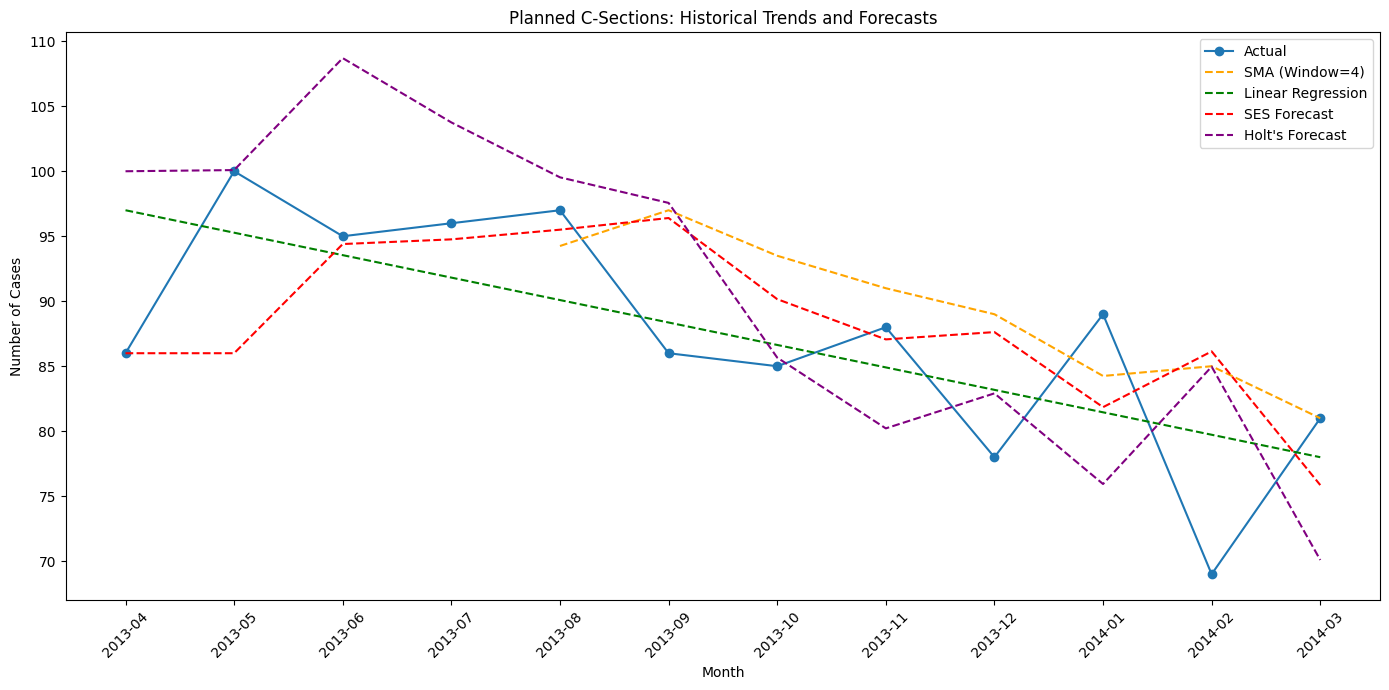

Forecast analysis complete!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "/Users/mac/Desktop/MIE1623/assignment2/planned.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Validate required columns
required_columns = ["Delivery Date", "Total Patient OR time"]
if not all(col in df.columns for col in required_columns):
    raise ValueError("Required columns are missing in the dataset.")

# Clean data and aggregate by month
df["Delivery Date"] = pd.to_datetime(df["Delivery Date"], errors='coerce')
df = df.dropna(subset=["Delivery Date", "Total Patient OR time"])
df["Month"] = df["Delivery Date"].dt.to_period("M")
monthly_data = df.groupby("Month")["Total Patient OR time"].count().reset_index()
monthly_data.rename(columns={"Total Patient OR time": "Planned_CS"}, inplace=True)

# Convert Month to numeric index for Linear Regression
monthly_data["Month_Index"] = np.arange(len(monthly_data))

# Simple Moving Average (SMA)
window_size = 4
monthly_data["SMA_Forecast"] = monthly_data["Planned_CS"].rolling(window=window_size).mean().shift(1)

# Linear Regression
X = monthly_data["Month_Index"].values.reshape(-1, 1)
y = monthly_data["Planned_CS"].values
lr_model = LinearRegression().fit(X, y)
monthly_data["LR_Forecast"] = lr_model.predict(X)

# Simple Exponential Smoothing (SES)
alpha = 0.6
ses_model = SimpleExpSmoothing(monthly_data["Planned_CS"]).fit(smoothing_level=alpha)
monthly_data["SES_Forecast"] = ses_model.fittedvalues

# Apply Holt’s model only if data is sufficient
if len(monthly_data) > 2:
    holt_model = Holt(monthly_data["Planned_CS"]).fit()
    monthly_data["Holt_Forecast"] = holt_model.fittedvalues
    use_holt = True
else:
    use_holt = False

# Calculate MSE and MAD for each model
def calculate_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mad = np.mean(np.abs(actual - forecast))
    return mse, mad

# Collect model metrics
models = ["SMA", "LR", "SES"]
if use_holt:
    models.append("Holt")

metrics = {}
for model in models:
    combined = monthly_data[["Planned_CS", f"{model}_Forecast"]].dropna()
    actual = combined["Planned_CS"]
    forecast = combined[f"{model}_Forecast"]
    mse, mad = calculate_metrics(actual, forecast)
    metrics[model] = {"MSE": mse, "MAD": mad}

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics).round(2)
print("\nForecast Metrics:")
print(metrics_df)

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(monthly_data["Month"].astype(str), monthly_data["Planned_CS"], label="Actual", marker='o', color='#1f77b4')
plt.plot(monthly_data["Month"].astype(str), monthly_data["SMA_Forecast"], label=f"SMA (Window={window_size})", linestyle='--', color='orange')
plt.plot(monthly_data["Month"].astype(str), monthly_data["LR_Forecast"], label="Linear Regression", linestyle='--', color='green')
plt.plot(monthly_data["Month"].astype(str), monthly_data["SES_Forecast"], label="SES Forecast", linestyle='--', color='red')
if use_holt:
    plt.plot(monthly_data["Month"].astype(str), monthly_data["Holt_Forecast"], label="Holt's Forecast", linestyle='--', color='purple')
plt.title("Planned C-Sections: Historical Trends and Forecasts")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("Forecast analysis complete!")





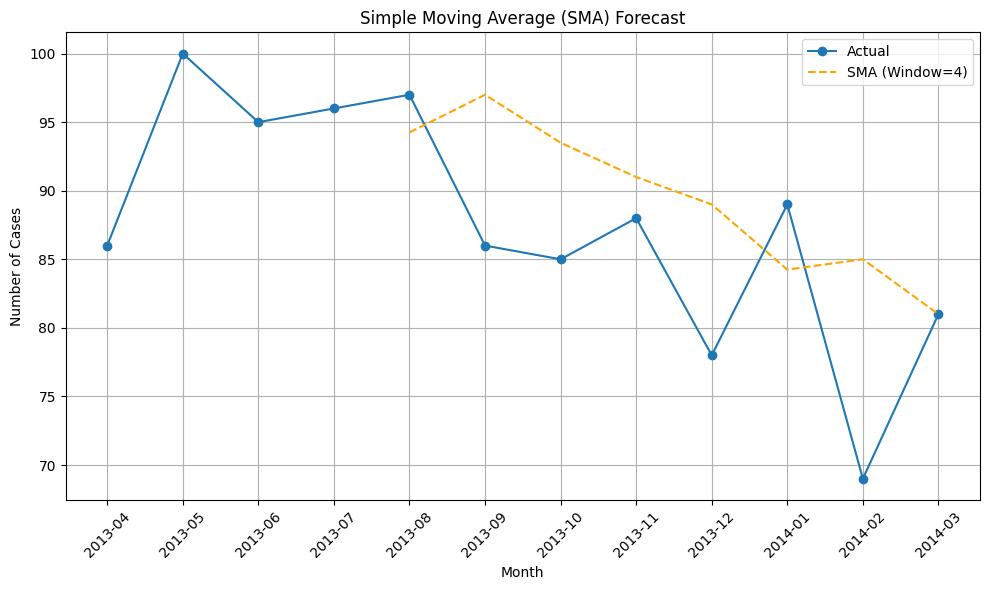

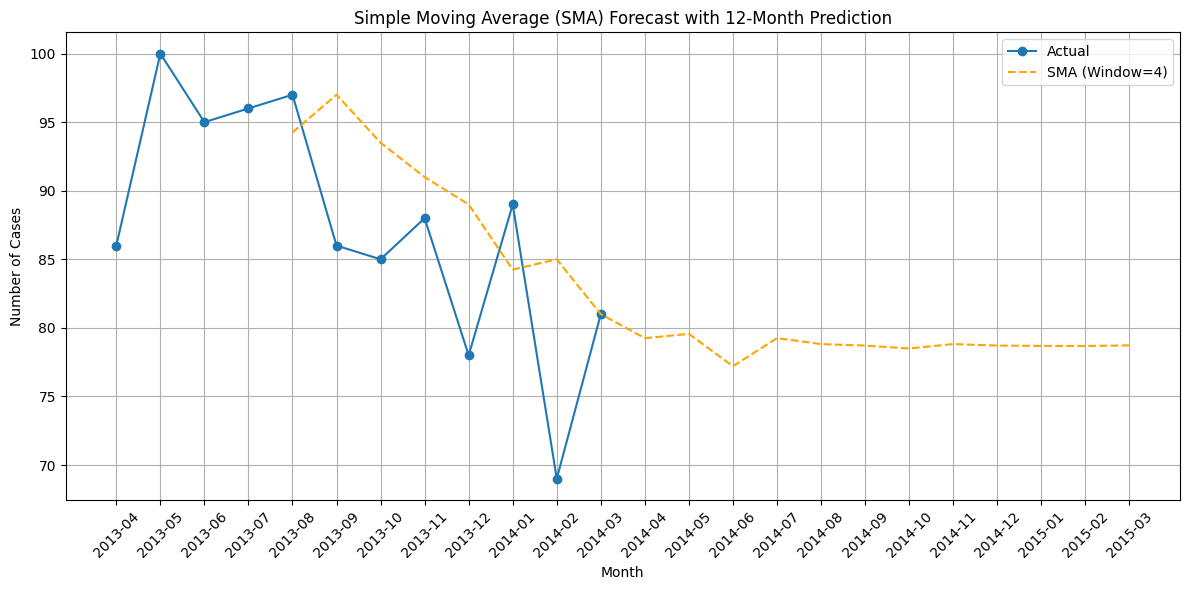


12-Month SMA Forecast:
      Month  SMA_Forecast
0   2014-04     79.250000
1   2014-05     79.562500
2   2014-06     77.203125
3   2014-07     79.253906
4   2014-08     78.817383
5   2014-09     78.709229
6   2014-10     78.495911
7   2014-11     78.819107
8   2014-12     78.710407
9   2015-01     78.683663
10  2015-02     78.677272
11  2015-03     78.722612

Simple Moving Average (SMA) Forecast Analysis:
MSE: 76.17
MAD: 7.12


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "/Users/mac/Desktop/MIE1623/assignment2/planned.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Validate required columns
required_columns = ["Delivery Date", "Total Patient OR time"]
if not all(col in df.columns for col in required_columns):
    raise ValueError("Required columns are missing in the dataset.")

# Clean data and aggregate by month
df["Delivery Date"] = pd.to_datetime(df["Delivery Date"], errors='coerce')
df = df.dropna(subset=["Delivery Date", "Total Patient OR time"])
df["Month"] = df["Delivery Date"].dt.to_period("M")
monthly_data = df.groupby("Month")["Total Patient OR time"].count().reset_index()
monthly_data.rename(columns={"Total Patient OR time": "Planned_CS"}, inplace=True)

# Simple Moving Average (SMA)
window_size = 4
monthly_data["SMA_Forecast"] = monthly_data["Planned_CS"].rolling(window=window_size).mean().shift(1)

# Calculate MSE and MAD
def calculate_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mad = np.mean(np.abs(actual - forecast))
    return mse, mad

combined = monthly_data[["Planned_CS", "SMA_Forecast"]].dropna()
actual = combined["Planned_CS"]
forecast = combined["SMA_Forecast"]
mse, mad = calculate_metrics(actual, forecast)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_data["Month"].astype(str), monthly_data["Planned_CS"], label="Actual", marker='o', color='#1f77b4')
plt.plot(monthly_data["Month"].astype(str), monthly_data["SMA_Forecast"], label=f"SMA (Window={window_size})", linestyle='--', color='orange')
plt.title("Simple Moving Average (SMA) Forecast")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()# ... (previous code remains the same until the analysis)

# Forecast for the next 12 months
last_window = monthly_data["Planned_CS"].iloc[-window_size:].values
sma_forecast = []
for _ in range(12):
    next_value = np.mean(last_window)
    sma_forecast.append(next_value)
    last_window = np.append(last_window[1:], next_value)

# Add forecast to the monthly_data DataFrame
forecast_months = pd.period_range(start=monthly_data["Month"].iloc[-1] + 1, periods=12, freq='M')
forecast_data = pd.DataFrame({"Month": forecast_months, "SMA_Forecast": sma_forecast})
monthly_data = pd.concat([monthly_data, forecast_data], ignore_index=True)

# Plot with forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data["Month"].astype(str), monthly_data["Planned_CS"], label="Actual", marker='o', color='#1f77b4')
plt.plot(monthly_data["Month"].astype(str), monthly_data["SMA_Forecast"], label=f"SMA (Window={window_size})", linestyle='--', color='orange')
plt.title("Simple Moving Average (SMA) Forecast with 12-Month Prediction")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print 12-month forecast
print("\n12-Month SMA Forecast:")
print(forecast_data[["Month", "SMA_Forecast"]])

# Analysis
print("\nSimple Moving Average (SMA) Forecast Analysis:")
print(f"MSE: {mse:.2f}")
print(f"MAD: {mad:.2f}")






/Users/mac/Library/Python/3.9/lib/python/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


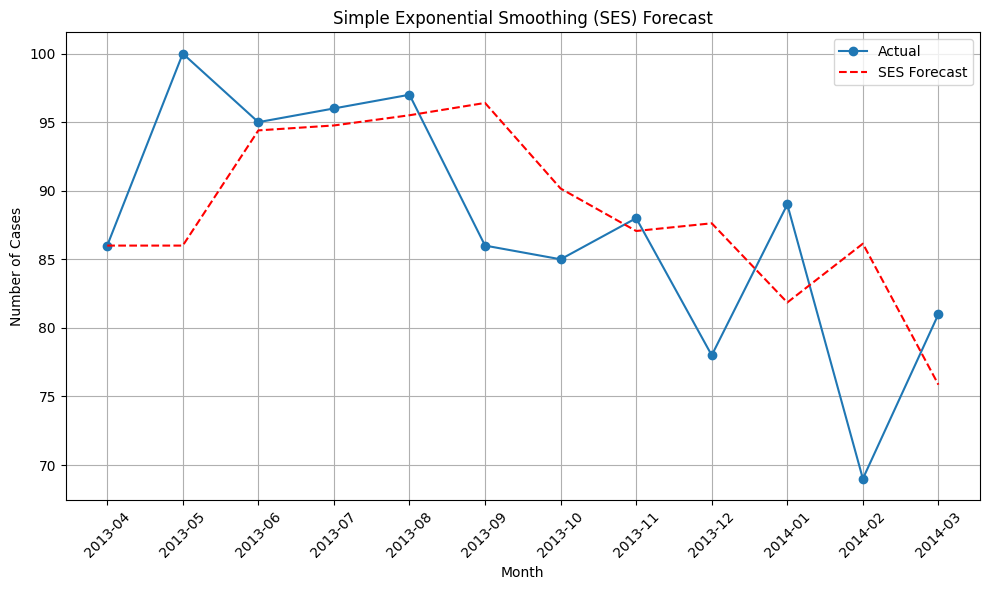


Simple Exponential Smoothing (SES) Forecast Analysis:
MSE: 66.65
MAD: 6.07


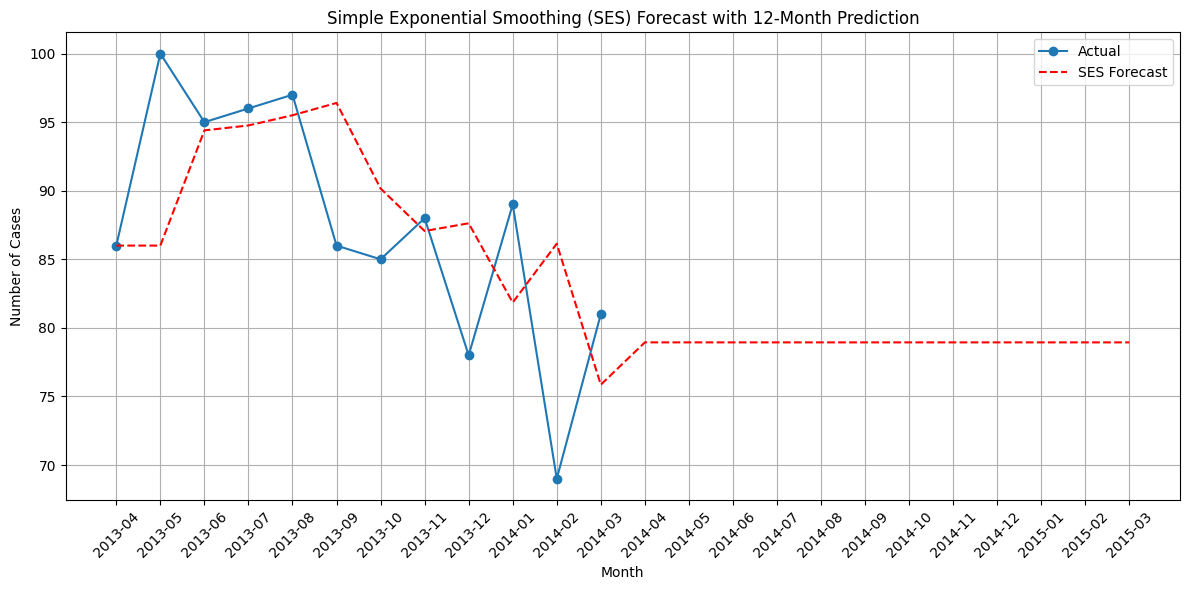


12-Month SES Forecast:
      Month  SES_Forecast
12  2014-04     78.942418
13  2014-05     78.942418
14  2014-06     78.942418
15  2014-07     78.942418
16  2014-08     78.942418
17  2014-09     78.942418
18  2014-10     78.942418
19  2014-11     78.942418
20  2014-12     78.942418
21  2015-01     78.942418
22  2015-02     78.942418
23  2015-03     78.942418


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "/Users/mac/Desktop/MIE1623/assignment2/planned.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Validate required columns
required_columns = ["Delivery Date", "Total Patient OR time"]
if not all(col in df.columns for col in required_columns):
    raise ValueError("Required columns are missing in the dataset.")

# Clean data and aggregate by month
df["Delivery Date"] = pd.to_datetime(df["Delivery Date"], errors='coerce')
df = df.dropna(subset=["Delivery Date", "Total Patient OR time"])
df["Month"] = df["Delivery Date"].dt.to_period("M")
monthly_data = df.groupby("Month")["Total Patient OR time"].count().reset_index()
monthly_data.rename(columns={"Total Patient OR time": "Planned_CS"}, inplace=True)

# Simple Exponential Smoothing (SES)
alpha = 0.6
ses_model = SimpleExpSmoothing(monthly_data["Planned_CS"]).fit(smoothing_level=alpha)
monthly_data["SES_Forecast"] = ses_model.fittedvalues

# Calculate MSE and MAD
def calculate_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mad = np.mean(np.abs(actual - forecast))
    return mse, mad

combined = monthly_data[["Planned_CS", "SES_Forecast"]].dropna()
actual = combined["Planned_CS"]
forecast = combined["SES_Forecast"]
mse, mad = calculate_metrics(actual, forecast)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_data["Month"].astype(str), monthly_data["Planned_CS"], label="Actual", marker='o', color='#1f77b4')
plt.plot(monthly_data["Month"].astype(str), monthly_data["SES_Forecast"], label="SES Forecast", linestyle='--', color='red')
plt.title("Simple Exponential Smoothing (SES) Forecast")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analysis
print("\nSimple Exponential Smoothing (SES) Forecast Analysis:")
print(f"MSE: {mse:.2f}")
print(f"MAD: {mad:.2f}")

# ... (previous code remains the same until the analysis)

# Forecast for the next 12 months
ses_forecast = ses_model.forecast(steps=12)

# Add forecast to the monthly_data DataFrame
forecast_months = pd.period_range(start=monthly_data["Month"].iloc[-1] + 1, periods=12, freq='M')
forecast_data = pd.DataFrame({"Month": forecast_months, "SES_Forecast": ses_forecast})
monthly_data = pd.concat([monthly_data, forecast_data], ignore_index=True)

# Plot with forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data["Month"].astype(str), monthly_data["Planned_CS"], label="Actual", marker='o', color='#1f77b4')
plt.plot(monthly_data["Month"].astype(str), monthly_data["SES_Forecast"], label="SES Forecast", linestyle='--', color='red')
plt.title("Simple Exponential Smoothing (SES) Forecast with 12-Month Prediction")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print 12-month forecast
print("\n12-Month SES Forecast:")
print(forecast_data[["Month", "SES_Forecast"]])

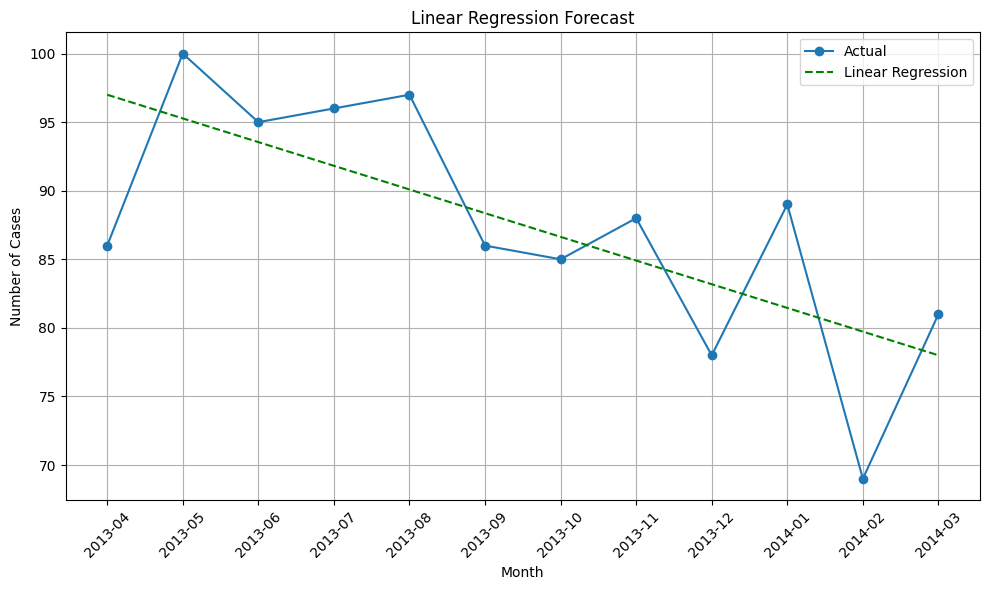


Linear Regression Forecast Analysis:
MSE: 36.36
MAD: 5.15


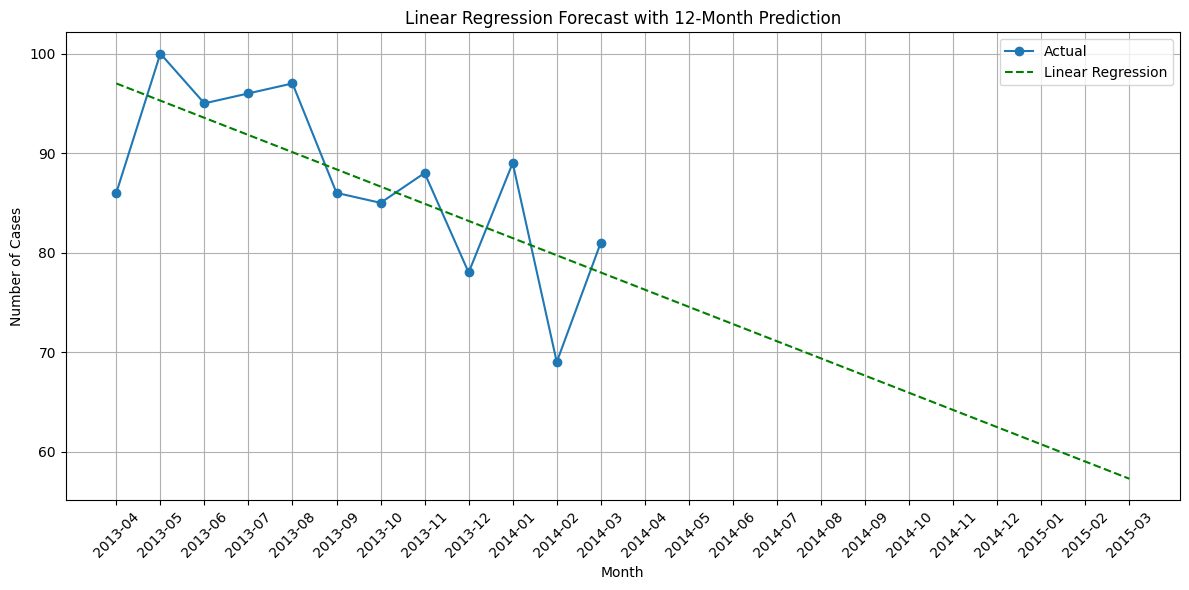


12-Month Linear Regression Forecast:
      Month  LR_Forecast
0   2014-04    76.272727
1   2014-05    74.545455
2   2014-06    72.818182
3   2014-07    71.090909
4   2014-08    69.363636
5   2014-09    67.636364
6   2014-10    65.909091
7   2014-11    64.181818
8   2014-12    62.454545
9   2015-01    60.727273
10  2015-02    59.000000
11  2015-03    57.272727


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "/Users/mac/Desktop/MIE1623/assignment2/planned.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Validate required columns
required_columns = ["Delivery Date", "Total Patient OR time"]
if not all(col in df.columns for col in required_columns):
    raise ValueError("Required columns are missing in the dataset.")

# Clean data and aggregate by month
df["Delivery Date"] = pd.to_datetime(df["Delivery Date"], errors='coerce')
df = df.dropna(subset=["Delivery Date", "Total Patient OR time"])
df["Month"] = df["Delivery Date"].dt.to_period("M")
monthly_data = df.groupby("Month")["Total Patient OR time"].count().reset_index()
monthly_data.rename(columns={"Total Patient OR time": "Planned_CS"}, inplace=True)

# Linear Regression
monthly_data["Month_Index"] = np.arange(len(monthly_data))
X = monthly_data["Month_Index"].values.reshape(-1, 1)
y = monthly_data["Planned_CS"].values
lr_model = LinearRegression().fit(X, y)
monthly_data["LR_Forecast"] = lr_model.predict(X)

# Calculate MSE and MAD
def calculate_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mad = np.mean(np.abs(actual - forecast))
    return mse, mad

combined = monthly_data[["Planned_CS", "LR_Forecast"]].dropna()
actual = combined["Planned_CS"]
forecast = combined["LR_Forecast"]
mse, mad = calculate_metrics(actual, forecast)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_data["Month"].astype(str), monthly_data["Planned_CS"], label="Actual", marker='o', color='#1f77b4')
plt.plot(monthly_data["Month"].astype(str), monthly_data["LR_Forecast"], label="Linear Regression", linestyle='--', color='green')
plt.title("Linear Regression Forecast")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analysis
print("\nLinear Regression Forecast Analysis:")
print(f"MSE: {mse:.2f}")
print(f"MAD: {mad:.2f}")

# ... (previous code remains the same until the analysis)

# Forecast for the next 12 months
last_index = monthly_data["Month_Index"].iloc[-1]
future_indices = np.arange(last_index + 1, last_index + 13).reshape(-1, 1)
lr_forecast = lr_model.predict(future_indices)

# Add forecast to the monthly_data DataFrame
forecast_months = pd.period_range(start=monthly_data["Month"].iloc[-1] + 1, periods=12, freq='M')
forecast_data = pd.DataFrame({"Month": forecast_months, "LR_Forecast": lr_forecast})
monthly_data = pd.concat([monthly_data, forecast_data], ignore_index=True)

# Plot with forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data["Month"].astype(str), monthly_data["Planned_CS"], label="Actual", marker='o', color='#1f77b4')
plt.plot(monthly_data["Month"].astype(str), monthly_data["LR_Forecast"], label="Linear Regression", linestyle='--', color='green')
plt.title("Linear Regression Forecast with 12-Month Prediction")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print 12-month forecast
print("\n12-Month Linear Regression Forecast:")
print(forecast_data[["Month", "LR_Forecast"]])

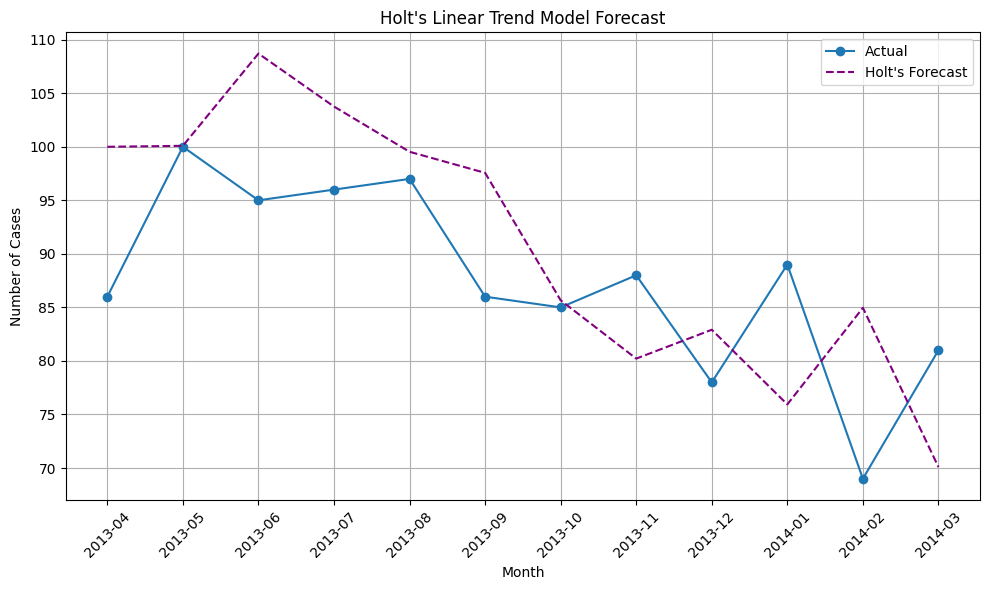


Holt's Linear Trend Model Forecast Analysis:
MSE: 101.13
MAD: 8.58


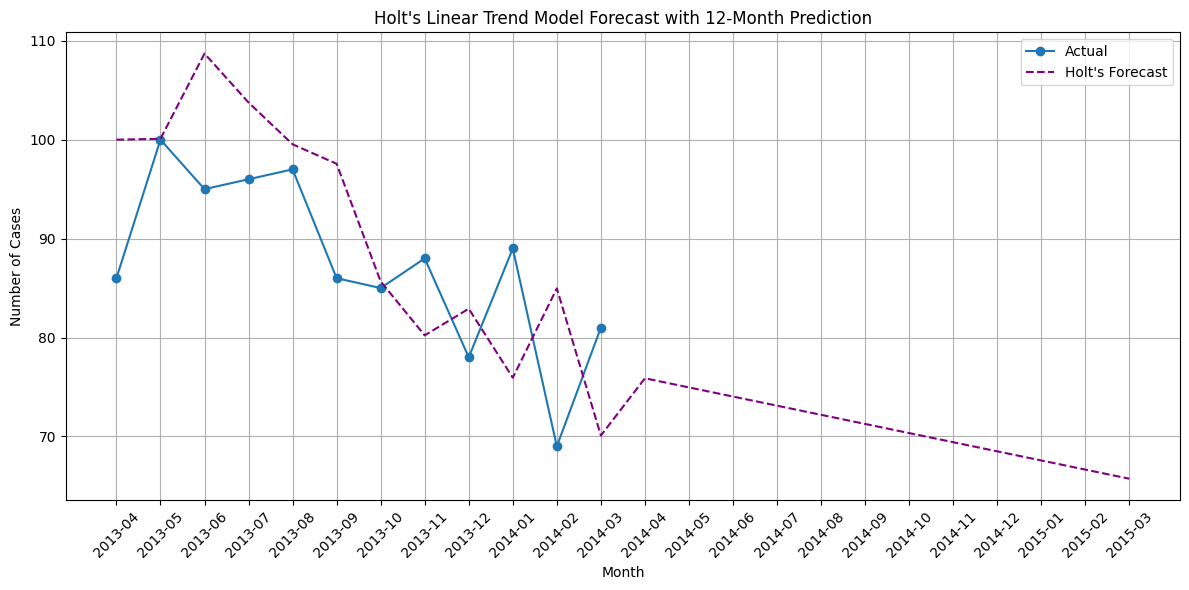


12-Month Holt's Forecast:
      Month  Holt_Forecast
12  2014-04      75.879648
13  2014-05      74.956581
14  2014-06      74.033513
15  2014-07      73.110445
16  2014-08      72.187377
17  2014-09      71.264309
18  2014-10      70.341242
19  2014-11      69.418174
20  2014-12      68.495106
21  2015-01      67.572038
22  2015-02      66.648971
23  2015-03      65.725903


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "/Users/mac/Desktop/MIE1623/assignment2/planned.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Validate required columns
required_columns = ["Delivery Date", "Total Patient OR time"]
if not all(col in df.columns for col in required_columns):
    raise ValueError("Required columns are missing in the dataset.")

# Clean data and aggregate by month
df["Delivery Date"] = pd.to_datetime(df["Delivery Date"], errors='coerce')
df = df.dropna(subset=["Delivery Date", "Total Patient OR time"])
df["Month"] = df["Delivery Date"].dt.to_period("M")
monthly_data = df.groupby("Month")["Total Patient OR time"].count().reset_index()
monthly_data.rename(columns={"Total Patient OR time": "Planned_CS"}, inplace=True)

# Holt's Linear Trend Model
if len(monthly_data) > 2:
    holt_model = Holt(monthly_data["Planned_CS"]).fit()
    monthly_data["Holt_Forecast"] = holt_model.fittedvalues
else:
    raise ValueError("Insufficient data for Holt's Linear Trend Model.")

# Calculate MSE and MAD
def calculate_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mad = np.mean(np.abs(actual - forecast))
    return mse, mad

combined = monthly_data[["Planned_CS", "Holt_Forecast"]].dropna()
actual = combined["Planned_CS"]
forecast = combined["Holt_Forecast"]
mse, mad = calculate_metrics(actual, forecast)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_data["Month"].astype(str), monthly_data["Planned_CS"], label="Actual", marker='o', color='#1f77b4')
plt.plot(monthly_data["Month"].astype(str), monthly_data["Holt_Forecast"], label="Holt's Forecast", linestyle='--', color='purple')
plt.title("Holt's Linear Trend Model Forecast")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analysis
print("\nHolt's Linear Trend Model Forecast Analysis:")
print(f"MSE: {mse:.2f}")
print(f"MAD: {mad:.2f}")

# ... (previous code remains the same until the analysis)

# Forecast for the next 12 months
holt_forecast = holt_model.forecast(steps=12)

# Add forecast to the monthly_data DataFrame
forecast_months = pd.period_range(start=monthly_data["Month"].iloc[-1] + 1, periods=12, freq='M')
forecast_data = pd.DataFrame({"Month": forecast_months, "Holt_Forecast": holt_forecast})
monthly_data = pd.concat([monthly_data, forecast_data], ignore_index=True)

# Plot with forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data["Month"].astype(str), monthly_data["Planned_CS"], label="Actual", marker='o', color='#1f77b4')
plt.plot(monthly_data["Month"].astype(str), monthly_data["Holt_Forecast"], label="Holt's Forecast", linestyle='--', color='purple')
plt.title("Holt's Linear Trend Model Forecast with 12-Month Prediction")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print 12-month forecast
print("\n12-Month Holt's Forecast:")
print(forecast_data[["Month", "Holt_Forecast"]])